<a href="https://colab.research.google.com/github/Aditya01237/Machine_Learning_2/blob/main/Forest_Cover_Type_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Neural Network Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reproducibility
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("Libraries imported and seeds set.")

Libraries imported and seeds set.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")
print("Path to dataset files:", path)

# Find the CSV file in the directory
csv_file = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_file = os.path.join(root, file)
            break

if csv_file:
    print(f"Loading data from: {csv_file}")
    df = pd.read_csv(csv_file)
    print(f"Dataset Shape: {df.shape}")
else:
    raise FileNotFoundError("No CSV file found in the downloaded path.")

# Display first 5 rows
df.head()

Using Colab cache for faster access to the 'forest-cover-type-dataset' dataset.
Path to dataset files: /kaggle/input/forest-cover-type-dataset
Loading data from: /kaggle/input/forest-cover-type-dataset/covtype.csv
Dataset Shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum().sum())

# Basic info
print("\nData Types:")
df.info()

# Statistical Summary
print("\nDescriptive Statistics:")
df.describe().T

Missing Values:
 0

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2    

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


/tmp/ipython-input-1951814129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cover_Type', data=df, palette='viridis')


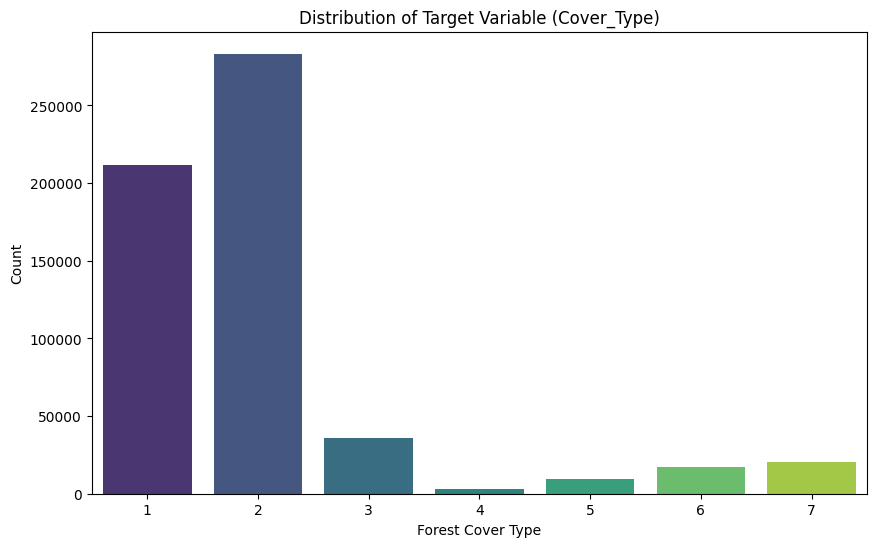

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=df, palette='viridis')
plt.title('Distribution of Target Variable (Cover_Type)')
plt.xlabel('Forest Cover Type')
plt.ylabel('Count')
plt.show()

# Print actual counts
print(df['Cover_Type'].value_counts().sort_index())

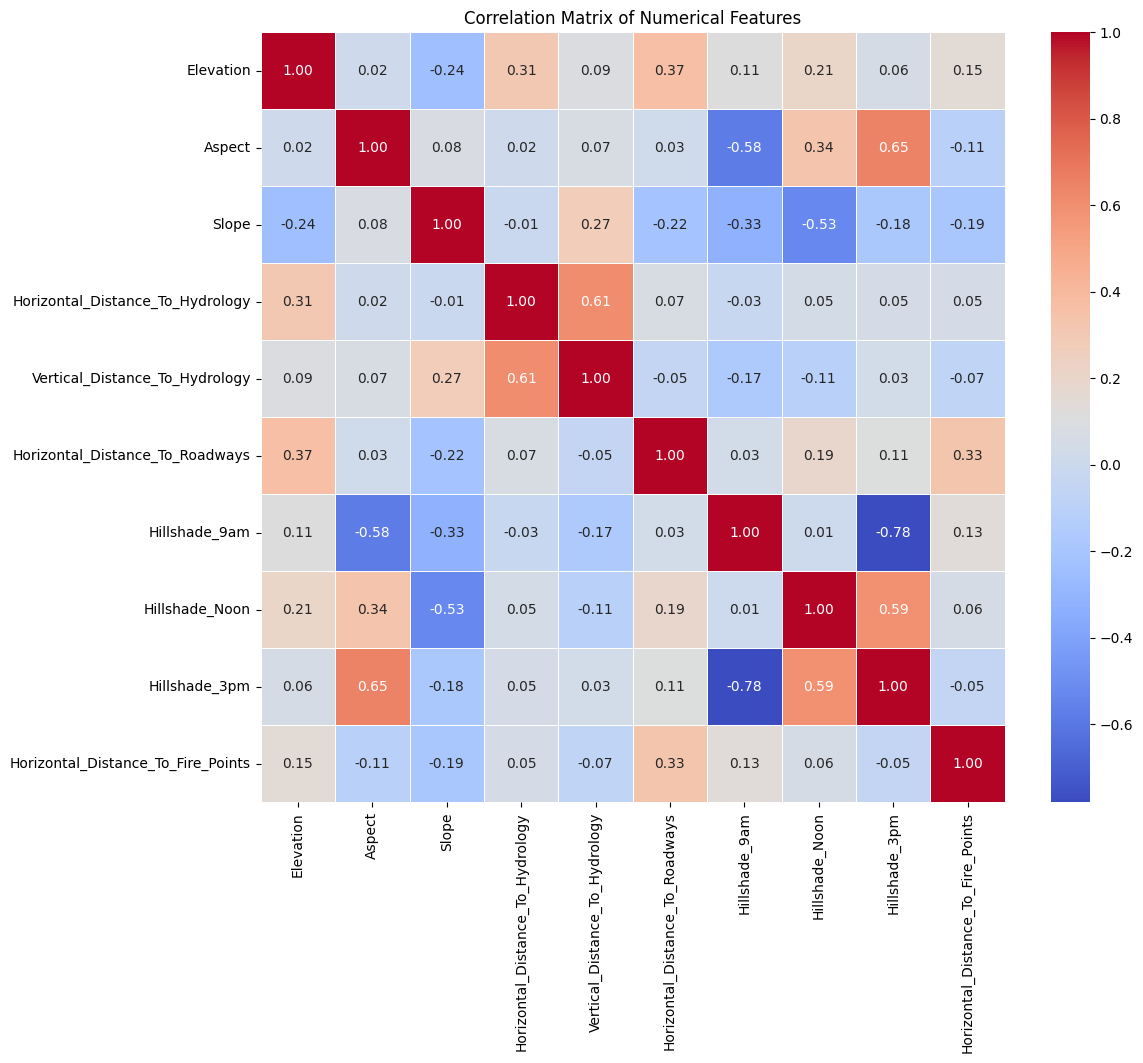

In [5]:
# Select only numerical features (excluding binary Soil/Wilderness columns)
numerical_cols = df.columns[:10]
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

/tmp/ipython-input-1896251825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette='viridis')


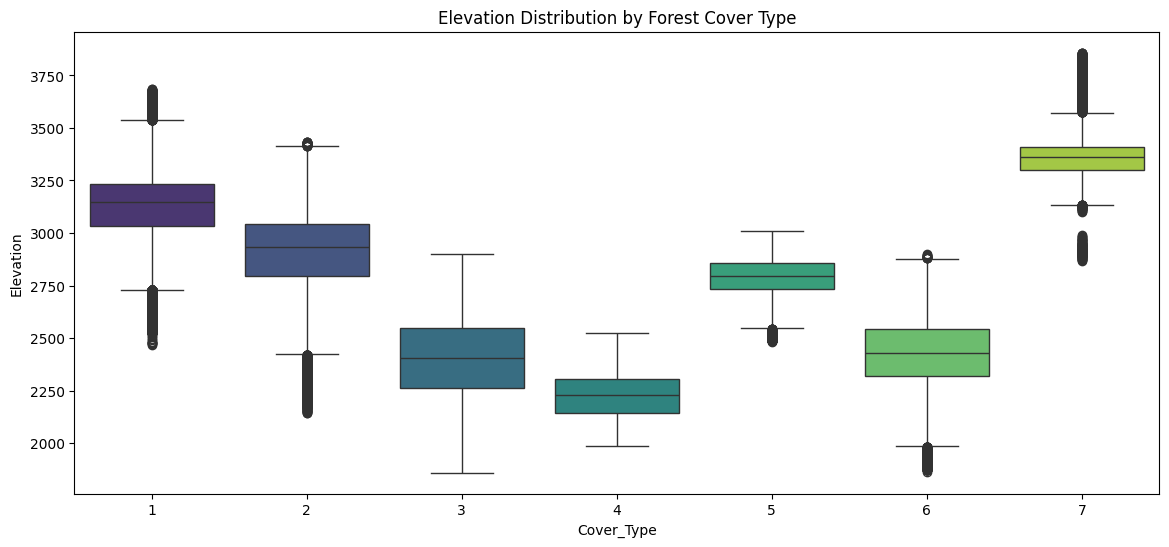

In [6]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette='viridis')
plt.title('Elevation Distribution by Forest Cover Type')
plt.show()

In [14]:
# Cell 6b: Outlier Handling (IQR Capping)

def cap_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values (instead of removing rows, which loses data)
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Apply only to numerical columns (first 10)
numerical_cols = df.columns[:10]
df = cap_outliers(df, numerical_cols)

print("Outliers capped using IQR method.")
df[numerical_cols].describe().T

Outliers capped using IQR method.


,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2962.802875,269.866502,2278.0,2809.0,2996.0,3163.0,3694.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.004978,7.207025,0.0,9.0,13.0,18.0,31.5
Horizontal_Distance_To_Hydrology,581012.0,266.004356,201.858018,0.0,108.0,218.0,384.0,798.0
Vertical_Distance_To_Hydrology,581012.0,43.612753,49.122119,-86.0,7.0,30.0,69.0,162.0
Horizontal_Distance_To_Roadways,581012.0,2349.968166,1558.747925,0.0,1106.0,1997.0,3328.0,6661.0
Hillshade_9am,581012.0,212.709818,25.009340,148.5,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.725011,18.478510,177.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.762943,37.548727,45.5,119.0,143.0,168.0,241.5
Horizontal_Distance_To_Fire_Points,581012.0,1933.934654,1196.214205,0.0,1024.0,1710.0,2550.0,4839.0


In [7]:
# 1. Separate Features and Target
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# 2. Adjust target to be 0-indexed (0-6) instead of 1-7 for Neural Networks
y = y - 1

# 3. Identify feature types
# Columns 0-10 are numerical, the rest are binary (Wilderness/Soil)
numerical_cols = X.columns[:10]
binary_cols = X.columns[10:]

# 4. Scale Numerical Features (Standardization is vital for SVM and NN)
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 5. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

# 6. Create a smaller subset specifically for SVM training to avoid timeouts
# Taking 20,000 samples for SVM training
X_train_svm, _, y_train_svm, _ = train_test_split(
    X_train, y_train, train_size=80000, random_state=SEED, stratify=y_train
)

print(f"Training Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")
print(f"SVM Training Subset Shape: {X_train_svm.shape}")

Training Shape: (464809, 54)
Test Shape: (116203, 54)
SVM Training Subset Shape: (80000, 54)


In [8]:
print("Training Logistic Regression...")
# 'saga' solver is faster for large datasets
lr_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200, random_state=SEED)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
lr_acc = accuracy_score(y_test, y_pred_lr)

Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70     42368
           1       0.75      0.80      0.77     56661
           2       0.68      0.80      0.74      7151
           3       0.61      0.43      0.51       549
           4       0.14      0.00      0.01      1899
           5       0.50      0.27      0.35      3473
           6       0.74      0.56      0.63      4102

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
print("Training SVM (on subset)...")
svm_model = SVC(kernel='rbf', C=1.0, random_state=SEED)
svm_model.fit(X_train_svm, y_train_svm)

# Predictions (Predicting on the full test set takes time but is feasible)
print("Predicting with SVM...")
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))
svm_acc = accuracy_score(y_test, y_pred_svm)

Training SVM (on subset)...
Predicting with SVM...

SVM Performance:
              precision    recall  f1-score   support

           0       0.81      0.76      0.79     42368
           1       0.80      0.87      0.84     56661
           2       0.75      0.86      0.80      7151
           3       0.81      0.46      0.59       549
           4       0.85      0.16      0.27      1899
           5       0.66      0.48      0.56      3473
           6       0.88      0.73      0.80      4102

    accuracy                           0.80    116203
   macro avg       0.80      0.62      0.66    116203
weighted avg       0.80      0.80      0.80    116203



In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("Building Improved Neural Network...")

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),

    # Layer 1
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Layer 2
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Layer 3
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    # Output Layer
    layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks to optimize training
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

# Train with more epochs (EarlyStopping will stop it automatically if needed)
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=256, # Larger batch size for speed
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Predict
y_pred_nn_prob = model.predict(X_test)
y_pred_nn = np.argmax(y_pred_nn_prob, axis=1)

# Evaluation
print("\nImproved Neural Network Performance:")
print(classification_report(y_test, y_pred_nn))
nn_acc = accuracy_score(y_test, y_pred_nn)
print(f"Final NN Accuracy: {nn_acc:.4f}")

Building Improved Neural Network...
Epoch 1/200
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.6845 - loss: 0.8704 - val_accuracy: 0.8005 - val_loss: 0.4779 - learning_rate: 0.0010
Epoch 2/200
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7749 - loss: 0.5251 - val_accuracy: 0.8244 - val_loss: 0.4194 - learning_rate: 0.0010
Epoch 3/200
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.7963 - loss: 0.4769 - val_accuracy: 0.8388 - val_loss: 0.3867 - learning_rate: 0.0010
Epoch 4/200
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8103 - loss: 0.4467 - val_accuracy: 0.8516 - val_loss: 0.3617 - learning_rate: 0.0010
Epoch 5/200
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8185 - loss: 0.4287 - val_accuracy: 0.8577 - val_loss: 0.3468 - learning_rate: 0.0010
Epoch 6/200
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8257 - loss: 0.4119 - val_accuracy: 0.8665 - val_loss: 0.3303 - learning_rate: 0.0010
Epoch 7/200
1453/1453 

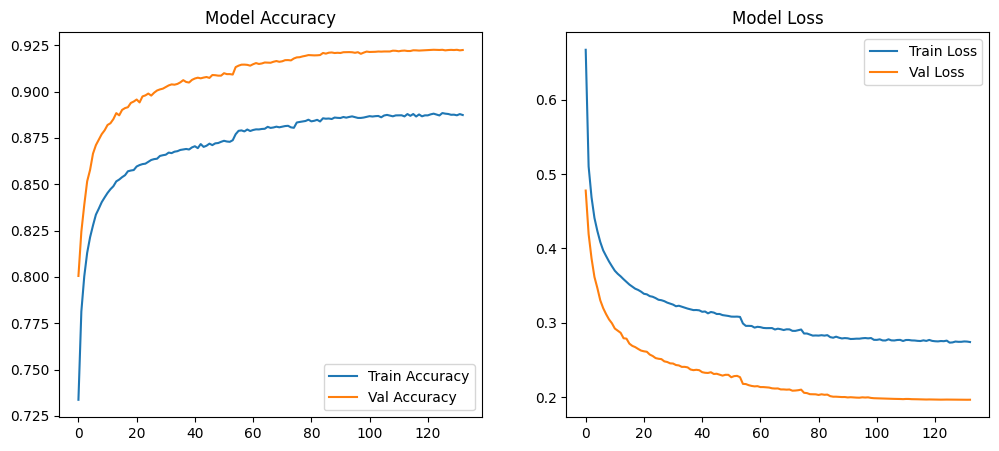

In [12]:
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

                 Model  Accuracy
0  Logistic Regression  0.723544
1                  SVM  0.801158
2       Neural Network  0.921913


/tmp/ipython-input-778072915.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='magma')


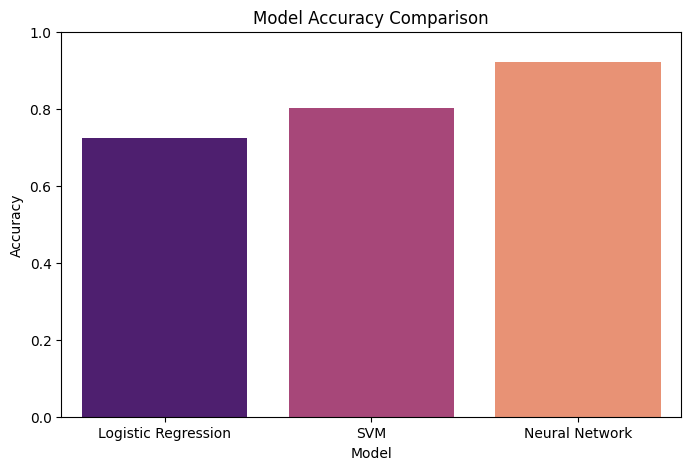

In [13]:
# Create DataFrame for comparison
models_data = {
    'Model': ['Logistic Regression', 'SVM', 'Neural Network'],
    'Accuracy': [lr_acc, svm_acc, nn_acc]
}

comparison_df = pd.DataFrame(models_data)
print(comparison_df)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=comparison_df, palette='magma')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

### **Performance Reasoning**

1.  **Neural Network & SVM (Best Performers):**
    * **Reason:** The relationship between cartographic variables (like elevation, aspect, and slope) and forest cover types is highly **non-linear**. Neural Networks (with ReLU activation) and SVMs (with RBF kernels) are specifically designed to capture these complex, non-linear boundaries.
    * **Feature Interaction:** NN likely captured interactions effectively (e.g., how "Elevation" combined with "Soil Type" determines tree growth).

2.  **Logistic Regression (Baseline):**
    * **Reason:** Logistic Regression creates linear decision boundaries. Given the complexity of ecological data, a straight line (or hyperplane) cannot effectively separate the 7 different forest types, leading to lower accuracy.

### **Reproducibility Note**
* Seeds were set to `42` for Numpy, Python random, Sklearn, and TensorFlow.
* Data preprocessing pipelines were standardized.